# Data Extraction

In [ ]:
# {
#   "reviewerID": "A2SUAM1J3GNN3B",
#   "asin": "0000013714",
#   "reviewerName": "J. McDonald",
#   "helpful": [2, 3],
#   "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",
#   "overall": 5.0,
#   "summary": "Heavenly Highway Hymns",
#   "unixReviewTime": 1252800000,
#   "reviewTime": "09 13, 2009"
# }

## Read raw data

In [16]:
# import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

# p =10000
# def getDF(path):
#     i = 0
#     df = {}
#     for d in parse(path):
#         df[i] = d
#         i += 1
#         if i%p == 0:
#             print(i,'th row: ', d)
        
#     return pd.DataFrame.from_dict(df, orient='index')

In [2]:
# read data
org_data = parse('../../data/item_dedup.json.gz')

# length distribution check
len_text, len_summary =[],[]
for d in org_data:
    len_text.append(len(d['reviewText'].split()))
    len_summary.append(len(d['summary'].split()))  
    
# import pickle 
# pickle.dump(len_text, open('len_text.pkl', 'wb'))
# pickle.dump(len_summary, open('len_summary.pkl', 'wb'))

In [1]:
# import pickle 
# len_text = pickle.load(open('len_text.pkl','rb'))
# len_summary = pickle.load(open('len_summary.pkl','rb'))

In [2]:
import pandas as pd

len_df = pd.DataFrame()
len_df['len_text'] = len_text
len_df['len_summary'] = len_summary

## Length of reviewtext

In [3]:
# length of review text 
len_df.len_text.describe()

,0
count,8.267714e+07
mean,8.484165e+01
std,1.187143e+02
min,0.000000e+00
25%,2.600000e+01
50%,4.500000e+01
75%,9.300000e+01
max,7.025000e+03


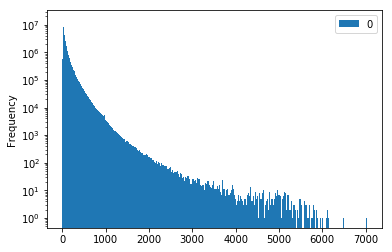

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

len_df.len_text.plot.hist(bins=1000)
plt.yscale('log')
plt.show()

[ 2343291 23306669 10918949  7524743  5704455  4537554  3661776  3005091
  2501605 11748605  6211290  1069422   130711     9595     2949      433]


Text(0.5, 0, 'Review text length')

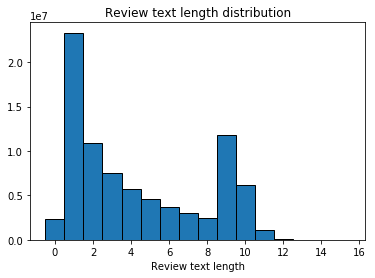

In [18]:
import numpy as np
fig = plt.figure()

bins = [0,20,30,40,50,60,70,80,90,100,200,500,1000,2000,3000,5000,7000]
hist,bins = np.histogram(len_df.len_text, bins=bins)
print(hist)

plt.bar(range(len(bins)-1),hist, width=1, edgecolor='k')
plt.title('Review text length distribution')
plt.xlabel('Review text length')
# plt.ylabel('y')

## Length of summary

In [3]:
# length of summary
len_df.len_summary.describe()

count    8.267714e+07
mean     4.064715e+00
std      2.807172e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      5.800000e+01
Name: len_summary, dtype: float64

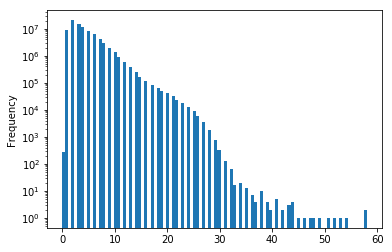

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

len_df.len_summary.plot.hist(bins=100)
plt.yscale('log')
plt.show()

In [13]:
import numpy as np
fig = plt.figure()

bins = [0,2,5,8,10,12,15,18,20,25,30,35,40,50,60]
hist,bins = np.histogram(len_df.len_summary, bins=bins)
print(hist)
# plt.bar(range(len(bins)-1),hist, width=1, edgecolor='k')
# plt.title('Review summary length distribution')
# plt.xlabel('Review summary length')

[ 8992765 46241975 18535359  4815326  2267175  1198742   364451   111255
   128463    21008      555       38       21        6]


<Figure size 432x288 with 0 Axes>

In [101]:
df

{0: {'asin': '0000013714',
  'helpful': [0, 0],
  'overall': 4.0,
  'reviewText': 'Heavenly Highway HymnsI ordered this hymnal because I learned to read shaped note music when I was a teenager. I play piano but do not sing. I am 85 years old. This hymnal has mostof the songs I have learned over the years. It was exactly what I wanted and needed.It was in good condition and the price was right. I purchased this book from Amazon.',
  'reviewTime': '10 16, 2012',
  'reviewerID': 'A3BED5QFJWK88M',
  'reviewerName': 'jimedd',
  'summary': 'Heavenly Highway Hymns',
  'unixReviewTime': 1350345600},
 1: {'asin': '0000013714',
  'helpful': [2, 3],
  'overall': 5.0,
  'reviewText': 'I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!',
  'reviewTime': '09 13, 2009',
  'reviewerID': 'A2SUAM1J3GNN3B',
  '

In [69]:
print(data.reviewText[0])
print('summary:', data.summary[0])
data[['asin','reviewText','summary']]

You may laugh, but I have found that Otherland volumes 1-4 are poor at picking up debris around the house.  I once spilled some cornflakes on the floor, and foolishly thought that I could clean it up by dropping &#34;City of Golden Shadows&#34; on it.  Not only did it not clean, it managed to make things worse by fragmenting the cornflakes into smaller and smaller pieces.  I did what any normal person would do: I stacked the other books on top, hoping that the combined power would whisk the cornflakes away to the technological wonderland that is Otherland.  No such results.Bin Otherland Empty, on the other hand, works like magic.  If you hook it up to a powerful enough motor, you can banish those cornflakes to the land of wind and ghosts.  The downside is that it's pretty light reading, but given the young adult trend these days it's following the light reading trend that literature is headed for these days.It's recommended that you get through the previous volume though (&#34;Hoover E

,asin,reviewText,summary
0,0000029831,"You may laugh, but I have found that Otherland...",The superior cleanser
1,0000029831,Do not try and vacuum the dust. That's impossi...,Very deep and thought provoking.
2,0000029831,What if Dread had come out victorious and left...,WHAT IF....?


In [29]:
# print(len(data.summary[0].split()))
# data.summary[0].split()

5


['Listing', 'is', 'all', 'screwed', 'up']

In [ ]:
# ['reviewerID': 'A10TK8OL2NJ1FU', 'asin': '0380797178', 'reviewerName': 'Jasmine', 'helpful': [4, 5], 'reviewText': "Well, Poppy and Erith are going to tell Ragweed's parents that he died, so on their way they meet Rye, who just so happens to be Ragweed's brother he is out seasrching for Ragweed, and then they break the news to him that Ragweed died, which actually might be a not so bad thing, because for Rye being second best in his family was a way of life they liked Ragweed better, but now would be a perfect chance for Rye to prove himself, I could tell you what happens, but you'll just have to read the book!.............!", 'overall': 5.0, 'summary': 'ANOTHER ONE!!!', 'unixReviewTime': 1043971200, 'reviewTime': '01 31, 2003']

In [8]:
df = getDF('../data/item_dedup.json.gz')

10000 th row:  {'reviewerID': 'A31058CO8X7LQN', 'asin': '000224053X', 'reviewerName': 'atr1688 "atr1688"', 'helpful': [2, 14], 'reviewText': 'It would take to many time to explain all the reasons why i loved this and the two following books. If you like hard sci-fi its a must read book.', 'overall': 5.0, 'summary': 'Best Science- Fiction ever red', 'unixReviewTime': 1106784000, 'reviewTime': '01 27, 2005'}
20000 th row:  {'reviewerID': 'AYE6KHD4A9CJN', 'asin': '0005019281', 'reviewerName': 'Kevin Barnett "KD Barnett"', 'helpful': [0, 0], 'reviewText': "I first saw this movie as a kid in the late 70's. I never forgot and when i found it on dvd i could not resist. It brought just as much enjoyment now as then. I like the twist on a classic with an American version.", 'overall': 4.0, 'summary': 'The Fonz does Scrooge', 'unixReviewTime': 1261526400, 'reviewTime': '12 23, 2009'}
30000 th row:  {'reviewerID': 'AQ5U1DAQLGKK1', 'asin': '0006550436', 'reviewerName': 'Lily', 'helpful': [0, 0], '

110000 th row:  {'reviewerID': 'A1EOZJW1OPR01', 'asin': '0007447868', 'reviewerName': 'Karen Miller', 'helpful': [22, 33], 'reviewText': "While I absolutely believe that there is no 'right' or 'wrong' response to a book, because it's all just personal opinion, I'm taken aback by some of the hostility I'm seeing here.If you went to see a play, would  you complain the story wasn't finished at the end of the first act? No. There's an interval and then there's a second act, and then there's the end. So okay, this story has more than 2 acts. By the end it will have, maybe, 7. So it's not really fair to say 'these characters aren't important' or 'this was just a bridge' or 'we didn't get to the end' ...  because until we do reach the end, we can't tell.I believe Martin is the single greatest fantasy writer of our time. I think he will go down in history as one of the greatest, full stop. Was I frustrated at the long time between books 3 and 4? You'd better believe it. Am I sorry that some of

230000 th row:  {'reviewerID': 'A28I5ZYRQ58VGD', 'asin': '0060282983', 'reviewerName': 'gwen wall', 'helpful': [0, 0], 'reviewText': 'The world needs to love one another again just as the characters in this story did!  Charlotte teaches us the true meaning of giving and love.', 'overall': 5.0, 'summary': 'A Wonderful Love Story', 'unixReviewTime': 1402444800, 'reviewTime': '06 11, 2014'}
240000 th row:  {'reviewerID': 'AE14CDBIN1KYA', 'asin': '0060392886', 'reviewerName': 'B. M. Ballard "Book Lover"', 'helpful': [0, 0], 'reviewText': 'This book was fantastic I loved the whole thing and read it in about 2 days. I would have liked to hear from Tommy Lee more as I found him to be the funniest and most interesting to read. All in all an awesome book that deserves 5 stars!!', 'overall': 5.0, 'summary': "Rockin' Book", 'unixReviewTime': 1163203200, 'reviewTime': '11 11, 2006'}
250000 th row:  {'reviewerID': 'A1US8UAPHMFBKW', 'asin': '0060509546', 'reviewerName': 'Gayle "brighttyger"', 'helpf

360000 th row:  {'reviewerID': 'A2TX179XAT5GRP', 'asin': '0060739592', 'reviewerName': 'TeensReadToo "Eat. Drink. Read. Be Merrier."', 'helpful': [10, 10], 'reviewText': 'Twelve-year-old Fern McAllister is the black sheep of her family, set apart by pale skin that blisters after moments in the sun and dark black hair in a family of blondes. Her strange sensitivity to light, and seeming ability to communicate with the family dog, are secondary concerns to the kids at her middle school who tease her for having an absent father. Despite gaining herself the nickname "freaky Fern," she leads a generally happy life, thanks to her mother\'s caring and her twinbrother Sam\'s friendship.But one day in the middle of English, Fern simply disappears. No one can find her; no one has seen her leave the room, much less her desk. Unbeknownst to her classmates, Fern has somehow managed to teleport to Pirate Cove, her favorite part of a nearby beach. Frightened and unsure of how she got there, Fern trie

410000 th row:  {'reviewerID': 'A2Q20HP871VSKW', 'asin': '0060820942', 'reviewerName': 'JerseyTomato', 'helpful': [21, 21], 'reviewText': "I cannot say enough wonderful things about this cookbook.  People have mentioned the beautiful photos and yes, they are certainly there.  The writing helps to weave a spell about the recipes.  You are not just making a soup, but the soup her aunt used to make when...The recipes will knock your socks off.  The roasted tomato tart is worth the price of the book.  My book club was blown away by the bluberry tart.  A gluten intolerant guest was thrilled with Gateau Lawrence.  (Flourless chocolate.  Easy, intense, and will make you a legend among your friends).  The soups are excellent too.  Oh yes, and the cabbage pie (galette) I made just because it sounded so weird, that was wonderful too.  The recipes seem to 'work' if you know what I mean.  You may choose to reduce the butter and make adjustments, but they turn out beautifully as written.One complai

540000 th row:  {'reviewerID': 'A1NWPOFCB9C7IL', 'asin': '0061093092', 'reviewerName': 'ReasonableGoatPerson', 'helpful': [0, 0], 'reviewText': 'Lawyer is a 7-letter word in my vocabulary, so color me shocked when I started reading Lily White, with a lawyer as its main character, and I was actually liking Ms White, not cursing her; nor imagining creative & painful ways in which she could be killed off, but wishing her a long and happy life. Surprise!The story is told in alternating chapters: one chapter in "the present", where Lily (known as Lee) is working as lawyer for a conman accused of murdering one of his marks; and then one in "the past", that tells Lee\'s life story, from her parents\' marriage, her subsequent birth, up until close to the time of the present-day story. Forth and back it goes.From the get-go, there are intimations of where the conman story is going, and really it\'s just a matter of how it plays out. Still, even despite knowing, I couldn\'t wait to find out what

670000 th row:  {'reviewerID': 'AY6L3PPCYAUS0', 'asin': '0061568228', 'reviewerName': 'Emrys R. Lloyd-Roberts', 'helpful': [10, 36], 'reviewText': 'This book starts with the premise that we do not know anything about the original gospels, now forming part of the new Testament, and then goes on to form a theological view based on what he images those original texts say. There are no facts about these gospels, only assumptions and conjecture.If you want a book about religion without reason and logic, this is your book.', 'overall': 1.0, 'summary': 'Salvation', 'unixReviewTime': 1347580800, 'reviewTime': '09 14, 2012'}
680000 th row:  {'reviewerID': 'ADFS4PIEY14G6', 'asin': '0061628018', 'reviewerName': 'Barbara N. Bybee "barbara_bybee         6867 ...', 'helpful': [1, 1], 'reviewText': "Excellent book....I'm from Utah and Warren Jeffs is in prison.....Yay,  Well, written.  Happy to see this intelligent girl is out of his clutches.", 'overall': 5.0, 'summary': 'Elissa Wall story.', 'unixR

800000 th row:  {'reviewerID': 'A1Q50CMX1G68LS', 'asin': '0061965804', 'reviewerName': 'cb', 'helpful': [3, 3], 'reviewText': 'Kind of an Ice Station Zebra,The Thing,meets an episode of x-files redux.The hero and heroine are seriously annoying.The tough-girl professor with the rabid anti-gun,anti military attitude gets old fast. As does her constant whining about things like a multi-million dollar heavy equipment elevator not being safe for her kid and complaining when someone opens a helicopter window because her kid might catch a draft.Coupled with asking if the real motive for the expedition is to allow "corporations" to rape the continent.Its all just a little too much for me.Our "hero" spelunker from Austrailia quickly realizes that the quickest way to professor moms heart is through the kid and makes every attempt to assure that he makes him his "little buddy". All the while complaining that the Military is destroying the "environment".Some might like it but......yeah, I\'m sendi

860000 th row:  {'reviewerID': 'A38RLKRBJOPTBW', 'asin': '0062024027', 'reviewerName': 'Autumn', 'helpful': [0, 0], 'reviewText': "LOVE.THIS. BOOK. If you are planning on seeing the new Divergent movie, don't until you read the book. Half of the movie won't make sense if you don't. I recommend this book to anyone 10-100.", 'overall': 5.0, 'summary': 'Just Another Divergent Fan', 'unixReviewTime': 1402963200, 'reviewTime': '06 17, 2014'}
870000 th row:  {'reviewerID': 'A18FKLN6W1O39B', 'asin': '0062026542', 'reviewerName': 'Lindsey Maxwell', 'helpful': [1, 1], 'reviewText': "I am trying to encourage everyone I know to read this series! No one listens to me. Rae Carson is unpredictable so I really didn't know how it was going to end. I just want everyone to pick up this series and read it. It was amazing. I giggled like a school girl and whooped through out this series. Loved the Hector chapters. The first time the chaper heading said &#34;Hector&#34; I believe I said out loud, &#34; Oh 

1000000 th row:  {'reviewerID': 'A3N4YAHBI0JRNF', 'asin': '0062217208', 'reviewerName': 'Ellen Horan "DOMAGRACE"', 'helpful': [9, 15], 'reviewText': "There is nothing more frightening than being wrongly accused. In a perfect world, one would simply correct the error and move on. What makes this a gripping book and a horror tale of sorts, is that Amanda Knox became trapped in an international legal nightmare. She was a middle class American student, who ended up in solitary confinement and imprisoned with hardened criminals for over four years for a murder that no rational person would think she committed. How that day to day reality unfolded is the basis of this book, up to her release. The who what and why it happened is still a mystery. Why did the Italian prosecutor hate her? Was the DNA evidence tampered with to frame her? Why did the legal system fail her? Where WAS the American consulate at any time, and early on in her ordeal? Where was the American State Dept? There are lots of

1140000 th row:  {'reviewerID': 'A1NATT3PN24QWY', 'asin': '0071373365', 'reviewerName': 'Rolf Dobelli "getAbstract"', 'helpful': [5, 15], 'reviewText': "Mark J. Barrenechea, a senior vice president for applications development at Oracle Corp., describes how to transform a company by using a range of e-business applications. He draws on Oracle's success at changing its business by using the Internet and networking to interconnect employees, customers and suppliers. Barrenechea's useful roadmap shows how your company can apply these methods to coordinate, systematize and streamline operations. He demonstrates how other companies - including General Motors, Boeing and Microsoft - use e-business networking. He writes in a straightforward style without jargon and maintains a keen focus on operations, making this book a wealth of practical knowledge. Of course, that same focus might limit the book's appeal to executives without an interest in operations technology and to other mainstream rea

1240000 th row:  {'reviewerID': 'A2KFOGTNOM42UH', 'asin': '0073376450', 'reviewerName': 'Deezer "Deezer"', 'helpful': [1, 3], 'reviewText': 'Great condition and quick service  - I was very pleased with this vendor in purchasing this book.  The whole process was quick and easy', 'overall': 5.0, 'summary': 'Great service', 'unixReviewTime': 1315180800, 'reviewTime': '09 5, 2011'}
1250000 th row:  {'reviewerID': 'A37M8Z2H5W7762', 'asin': '0073527963', 'reviewerName': 'Yeed', 'helpful': [0, 0], 'reviewText': 'The book is lengthy and is everything you expect from a criminal justice book with some added bonuses such as little included stories in the chapter to help the reader to better understand the concepts and chapter as well as the vocabulary of the text book.', 'overall': 4.0, 'summary': 'Criminal justice', 'unixReviewTime': 1360972800, 'reviewTime': '02 16, 2013'}
1260000 th row:  {'reviewerID': 'AC9ZMFQB5BAV6', 'asin': '0077514742', 'reviewerName': 'Nicole', 'helpful': [0, 0], 'review

1340000 th row:  {'reviewerID': 'A3ETKB8439BBQR', 'asin': '0123694736', 'reviewerName': 'T. Cunningham "Rb Man"', 'helpful': [1, 1], 'reviewText': "If all of the Apple frameworks were explained as well as CoreGraphics/Quartz is in this book, life would be so much better for independent programmers. I am not writing code in XCode, but one where I need to port calls to custom classes. This book has helped me so much. I have not located the link on the publisher's site (maybe I'm just missing it), but my only complaint (a very minor one) would be that they don't have a contact email for the authors to report errata or thank them.Well written, to the point, good code examples and does not duplicate the Apple documents. Covers Carbon and Cocoa calls. The chapters on axial and radial shadings were the most helpful for me.", 'overall': 5.0, 'summary': 'Excellent Book', 'unixReviewTime': 1179014400, 'reviewTime': '05 13, 2007'}
1350000 th row:  {'reviewerID': 'AF0W0VJRVCE99', 'asin': '01302080

1440000 th row:  {'reviewerID': 'ABYT6AXJ1TEO9', 'asin': '0138419418', 'reviewerName': 'Vivien', 'helpful': [0, 0], 'reviewText': "This is my textbook.  but i don't like it very much.  i am the beginner of the JavaScript, this book even doesn't help me at all.  there are a lot of things had not talked about it before it pop up, it just suddenly appear before your eyes.  I always get lost because of that.", 'overall': 1.0, 'summary': 'If your are the beginner, this is not your choice !!!!!!!', 'unixReviewTime': 1016409600, 'reviewTime': '03 18, 2002'}
1450000 th row:  {'reviewerID': 'A3RKEF64X6KZ17', 'asin': '0140053204', 'reviewerName': 'C. Lewis', 'helpful': [0, 0], 'reviewText': 'Easy read, lots of cute one-liners and a little wisdom.  Interesting to read about his Southern encounters in the 1960s.', 'overall': 4.0, 'summary': 'Nice read', 'unixReviewTime': 1395446400, 'reviewTime': '03 22, 2014'}
1460000 th row:  {'reviewerID': 'A1Y8CLNTCLR04O', 'asin': '0140098275', 'reviewerName':

1520000 th row:  {'reviewerID': 'A1T17LMQABMBN5', 'asin': '0140298479', 'reviewerName': 'CoffeeGurl', 'helpful': [8, 8], 'reviewText': "This novel was a great read, it was hilarious.  May I say that I think it's funnier than the original. Of course, it is not very different from the original -- she is still trying to quit smoking and trying to lose  weight, but the heroine seems a little more together this time  around.There was a setback, the whole death threat thing, for a minute  there I thought I was reading a mystery novel (I hate mystery novels) --  but other than that, it is great!  I was cracking up on the subway train on  my way to work this morning while I read the chapter in which she was  interviewing Colin Firth -- the actor who played Mr. Darcy in Pride and  Prejudice. The people on the train were staring at me, but I couldn't help  it, it was too funny.I know it sounds insane but I do wish Miss Fielding  writes another Bridget Jones novel. I would happily buy all the Bri

1600000 th row:  {'reviewerID': 'A1ZWGRWZV428LV', 'asin': '014104022X', 'reviewerName': 'Brian', 'helpful': [0, 0], 'reviewText': 'A wonderful story full of many aspects of the many facets of a hard and difficult journey. Warm strong emotional.', 'overall': 5.0, 'summary': 'A heart warming story', 'unixReviewTime': 1382486400, 'reviewTime': '10 23, 2013'}
1610000 th row:  {'reviewerID': 'A1ZPO4Y05SPIWW', 'asin': '0141187425', 'helpful': [16, 28], 'reviewText': "Drawing upon the work of Michel Foucault, Edward Said claims that Western ideas of the `Orient' are not based upon objective facts but are created through academic and cultural `discourses' which serve to promote Western imperialism - often despite `liberal' intentions.This mythical `East' is the antithesis of the West, a negative or inversion of the 'Occident' which is used to define *both* in binary opposition to each other, and to facilitate the political and domination of the East.However in order to demonstrate the existenc

1690000 th row:  {'reviewerID': 'A14JH0ILQ660IT', 'asin': '0142196193', 'reviewerName': 'Free Polazzo', 'helpful': [5, 8], 'reviewText': 'I really like these books and the way they are written.  The question and answer format make it easy to use it as a "reference" and also allows one to read a few pages at a time.The question and answer format is also wonderful because alot of what Judiasm is about is questions.  "Question Everything" must have been the eleventh commandment.What is missing are important topics.  I wrote to the author in 1996 and he was kind enough to repy to my question.  I wrote:"I enjoy reading your book . . .  However, there is a major omission that I need to ask about.  Why is the subject of War (and violence) not covered?Your biography says you were/are active as a military chaplain.  I imagine that your role as chaplain and advisor to chaplains would put you in a great position to speak to the question of war and Jewish Law.Perhaps your wrote about this in anoth

1780000 th row:  {'reviewerID': 'A23ORR2740NR2U', 'asin': '0143037838', 'reviewerName': 'Greg Beesch "GregB"', 'helpful': [25, 34], 'reviewText': 'The tone of arrogance and condescension really diminish what would otherwise be a good autobiographical case study of growing a hobby/skill into a successful brand. Critical self assessment is sometimes subordinated to over emotive passages and screeds about Chouinard\'s take social and economic trends.  Some of the more interesting aspects of forming company goals and culture were lost amid a general tone of contempt for what Chouinard considers `the business world\'.  The good stuff is there, you just have to get past the maverick chest thumping and "I am a reluctant businessman and I run my business better without old and tired business practices and paradigms. . . like profit".Two things were rather galling. First, the first sentence "No young kid growing up ever dreams of becoming a businessman." Well, sorry, a lot of kids actually do, 

1890000 th row:  {'reviewerID': 'A1FPVKQVRRF2ZA', 'asin': '0143170104', 'reviewerName': 'Amy Senk "Read it, Loved it"', 'helpful': [0, 1], 'reviewText': "The Girl Who Played With Fire is better than the first book -- and I adored the first book, so that's saying something. In this second book of the trilogy, we learn about Lisbeth -- everything from what she did right after the first book ended to what made her the person she became -- in a complicated, intricately plotted story.The opening scenes with Lisbeth enjoying new riches on the beach didn't seem to add much to the story, but once she was home in Europe, wham! It was like a roller coaster taking off, with journalists doing their thing, sex traders doing their thing, killers doing their thing and Lisbeth doing her thing.The story, told through various characters' perspectives, is gripping and entertaining. And the ending is great -- answering questions but raising new ones.When is book three coming out in the U.S.??", 'overall':

1990000 th row:  {'reviewerID': 'ATB5DQ3SVQ27G', 'asin': '0195014766', 'reviewerName': 'Charles Bukowski "buk1818"', 'helpful': [0, 8], 'reviewText': 'this book is in excellent shape.  BUT, I ordered it on May 5th , 2009, and did not receive it until June 1st, 2009.  That is way way way way too long to get my book, and I will not order from this customer again.', 'overall': 4.0, 'summary': 'The Art of War, by Sun Tzu, Thomas Cleary used book', 'unixReviewTime': 1244246400, 'reviewTime': '06 6, 2009'}
2000000 th row:  {'reviewerID': 'A1VE8QL8RJ9SCU', 'asin': '0195103092', 'reviewerName': 'tyler zarubin', 'helpful': [0, 7], 'reviewText': 'upon pondering motives for writing this everlasting existential review, i have prostrated that this novel portrays one tipple of a protagonist who through the use of foretasting one is able to percieve ebony in the  circumstances faced by Capitu.  a most separatist prognosis is in order for  this linear novel.', 'overall': 5.0, 'summary': 'an insightful

2080000 th row:  {'reviewerID': 'A2FC00C1NFO59J', 'asin': '0201632160', 'reviewerName': 'Leo Free "Art Scents"', 'helpful': [3, 4], 'reviewText': "I first saw a picture or two on some program to download desktop photos.  I followed some info cuz I was captivated by the Alice pictures.  I discovered Robyn's journey, story and this story book.  I considered buying a used one, but decided to get a new one.  I just love the whole of it and so appreciate  the author not only taking the journey but sharing it with the rest of us.  Even if some of the sharing was against her original plans.  Thanks Robyn.  Your journey touches deeply in inexplicable ways.", 'overall': 5.0, 'summary': 'e Intimacy of Inspiration', 'unixReviewTime': 1171152000, 'reviewTime': '02 11, 2007'}
2090000 th row:  {'reviewerID': 'A3705CPTAQ8BQV', 'asin': '020502940X', 'reviewerName': 'sagarcia_1', 'helpful': [1, 1], 'reviewText': 'Buying the Kindle version, I now have access to it on my MacBook Pro, iPad, and iPhone. Si

2220000 th row:  {'reviewerID': 'A4AU217EBQ47L', 'asin': '0271021195', 'reviewerName': 'D. Moore "Clouseau"', 'helpful': [2, 2], 'reviewText': "A thoughtfully detailed and entertaining narrative with lots of captivating photos of the key people and places of Lincoln's visits to the Commonwealth.  I also liked the appendix which provided guidance on how to follow and experience the Lincoln Trail. I'm not a Lincoln expert, so the accounts of his experiences here were new to me and fascinating to read... but that also means my rating is just a reflection of how much I liked this book, not a comparison to other books about Mr. Lincoln. It is unquestionably well-written.", 'overall': 5.0, 'summary': 'Fascinating,  highly detailed, great pictures!', 'unixReviewTime': 1011139200, 'reviewTime': '01 16, 2002'}
2230000 th row:  {'reviewerID': 'A2IO5NPN61YVWZ', 'asin': '0292716265', 'reviewerName': 'William R. Robertson', 'helpful': [0, 0], 'reviewText': 'I thoroughly enjoyed "One Ranger" and thi

2320000 th row:  {'reviewerID': 'AFZG8ESZAYAYA', 'asin': '0307265757', 'reviewerName': 'Alexander R. Seals', 'helpful': [1, 2], 'reviewText': 'Very descriptive, yet very entertaining, story of Pixar.  This book is told from an unbiased point of view and is engaging from beginning to end.  Definitely recommend for any fan of Pixar!', 'overall': 5.0, 'summary': 'Engaging and Entertaining!', 'unixReviewTime': 1230249600, 'reviewTime': '12 26, 2008'}
2330000 th row:  {'reviewerID': 'A2P5XNVLKUIWR', 'asin': '0307268934', 'reviewerName': 'Ann H Smith', 'helpful': [0, 1], 'reviewText': 'This adventure is blended with  both history and anthropology.  It is informative and compelling.  I do not recommend it for those who only like romance novels or are squemish. It is very informative about an area many of us know little about.', 'overall': 5.0, 'summary': 'GREAT TRUE STORY PLUS HISTORY', 'unixReviewTime': 1354665600, 'reviewTime': '12 5, 2012'}
2340000 th row:  {'reviewerID': 'A356JAJSFPFB5P',

2390000 th row:  {'reviewerID': 'AV09RSTTTQLJW', 'asin': '0307292134', 'reviewerName': 'Logan Ralph', 'helpful': [0, 1], 'reviewText': "Mr. Martin has a gift for great storytelling. I can't wait to check out the HBO series to see how it stacks up to the books. A great read and an even greater escape!", 'overall': 5.0, 'summary': 'A Song of Ice and Fire, Books 1-4', 'unixReviewTime': 1371427200, 'reviewTime': '06 17, 2013'}
2400000 th row:  {'reviewerID': 'A10AVWN2AVDV0V', 'asin': '0307340805', 'reviewerName': 'R. Moore', 'helpful': [0, 1], 'reviewText': "A classic and must-have for every child's book collection. Golden Books are so fun, and this is a great set to get started with.", 'overall': 4.0, 'summary': 'A classic!', 'unixReviewTime': 1225670400, 'reviewTime': '11 3, 2008'}
2410000 th row:  {'reviewerID': 'A25JGEQR5CTSCD', 'asin': '0307346609', 'reviewerName': 'Donna Kuhlmorrison "dragonlady444"', 'helpful': [0, 0], 'reviewText': "I didn't actually see or read the book, it was a 

2480000 th row:  {'reviewerID': 'A1CUZ9COVUDK0J', 'asin': '0307457753', 'helpful': [0, 0], 'reviewText': "What a fantastic book on how we can be bold and relentless in Christ. As a believer in the gifts of God and all that we have power to do through the Holy Spirit this book was an amazing read.  I can't wait to share this book with my congregation and get down to work on what we have authority to do in this world.Never give up! Keep knocking and seeking God for what it is we have authority over!*I received this book as part of the Blogging for Books from waterbrookmultnomah*", 'overall': 5.0, 'summary': 'Wow!', 'unixReviewTime': 1335312000, 'reviewTime': '04 25, 2012'}
2490000 th row:  {'reviewerID': 'AT2EFXZXSSN0R', 'asin': '0307462889', 'reviewerName': 'Judith L', 'helpful': [1, 1], 'reviewText': "This is a very practical guide and learning book for those of us evolving into what our society (laughingly) calls 'senior-hood' - whatever that means.  Clearly, Martha is an example of g

2630000 th row:  {'reviewerID': 'A3K6AG60YBLNZY', 'asin': '0307749649', 'reviewerName': 'Judy Aishman', 'helpful': [0, 0], 'reviewText': 'I loved the continuation of the story line & characters from his previous book. It was hard to figure out who the bad guys were.', 'overall': 4.0, 'summary': 'A very good read', 'unixReviewTime': 1384300800, 'reviewTime': '11 13, 2013'}
2640000 th row:  {'reviewerID': 'A10Z7AYDEVC6S6', 'asin': '0307885259', 'reviewerName': 'farm girl', 'helpful': [0, 0], 'reviewText': 'I felt it dragged along and took forever to get new information.  Get to the point of what you want to say.', 'overall': 3.0, 'summary': 'too much needless info', 'unixReviewTime': 1376438400, 'reviewTime': '08 14, 2013'}
2650000 th row:  {'reviewerID': 'A2GXRU3M22GWY1', 'asin': '0307887898', 'reviewerName': 'Ilya B.', 'helpful': [0, 0], 'reviewText': 'This is a very well written book with implementable advice for anyone who either aspires to create a technology business or experiments

2800000 th row:  {'reviewerID': 'A3BPB7823FZGU2', 'asin': '0310318653', 'reviewerName': 'Crystal DeKalb', 'helpful': [0, 1], 'reviewText': 'One of the most awesome Spirit-filled reads I have come across in a long time.  I am ordering more for my friends and family.  OUTSTANDING!!!', 'overall': 5.0, 'summary': '"One Thousand Gifts"..a breathtaking gift all its own!', 'unixReviewTime': 1350691200, 'reviewTime': '10 20, 2012'}
2810000 th row:  {'reviewerID': 'A2FFL3BAVY9O1V', 'asin': '031032906X', 'reviewerName': 'Adam G Binley', 'helpful': [2, 2], 'reviewText': 'Whether you agree with Rick Warren or not this book is a great read and offers great insight into the mind and character of God. I have been richly blessed learning about the will of God and his purpose for my life. Thank you.', 'overall': 5.0, 'summary': 'A book everyone should read', 'unixReviewTime': 1394323200, 'reviewTime': '03 9, 2014'}
2820000 th row:  {'reviewerID': 'A3JRNFSKJR4C2N', 'asin': '0310332796', 'reviewerName': 

2920000 th row:  {'reviewerID': 'A1K3866HEJZ8RP', 'asin': '0312264917', 'reviewerName': 'Locococo', 'helpful': [19, 21], 'reviewText': 'Chadwick\'s writing is superb, her knowledge of all things medieval and the wool trade is beyond question, but couldn\'t we have chosen more sympathetic characters? Miriel starts off promising as a victim of her mother\'s bad decision in a husband. She\'s been groomed for the wool trade by her indulgent and successful grandfather but then rushed to the nunnery. She\'s constantly a thorn in the side of the nuns and then meets deathly ill Nicholas, who was washed ashore from an ill-fated baggage wain of King John. She helps to nurse him back to health (did we forget there were two other nuns involved in his nursing?), then runs away from the convent when they rid her of her one vanity - her hair - after she shows it off to Nicholas and gets caught. We see this character lie, cheat, steal, and then marry twice to further her position. She commits adultery

3020000 th row:  {'reviewerID': 'A22IKTDMVR681U', 'asin': '0312366523', 'reviewerName': 'gbear "al"', 'helpful': [8, 10], 'reviewText': "I bought this book mostly because I wanted to read stories about Ron's days with The Faces. I saw them play many times and they were one of my favorite live bands back in the late 70's.I'm sure that Ron Wood's story is interesting and compelling on many levels, but this book is a waste. Disorganized doesn't begin to cover how haphazardly this book is assembled. It doesn't work as history, it doesn't work as adventure, and it barely works as biography. It works best as an exercise in cluelessness, as Ron doesn't seem to have any idea how screwed up he sounds. One minute he's writing about how spectacularly broke he is, then within two sentences he's talking about flying off for a tropical vacation somewhere. Supposedly earthshattering events in his life are covered in one sentence (the deaths of loved ones is used to justify more drugs and booze). Havi

3140000 th row:  {'reviewerID': 'AV1D9B474J6LH', 'asin': '0312581777', 'reviewerName': 'LM', 'helpful': [1, 1], 'reviewText': 'This book is a must read if you have any political interests.  The subject seem to be covered very well.  I does seem to be balanced but I am in the middle any ways.  I have recomended this book to may people.', 'overall': 5.0, 'summary': 'Book Review', 'unixReviewTime': 1340064000, 'reviewTime': '06 19, 2012'}
3150000 th row:  {'reviewerID': 'A1KB5A2ZEMT8H3', 'asin': '0312596901', 'reviewerName': 'Lana Larue', 'helpful': [25, 25], 'reviewText': "This book is a fictional romance, based very little on true history. I was excited when I saw this book since so little has been written about Jane Seymour. There must not be much about her in historical documents either, so Erickson just made it up.  It is a really bad romance novel; not at all like the Tudor novels I love. It is my fault: this is the one time I didn't download the sample first. I doubt I would have b

3180000 th row:  {'reviewerID': 'A2AFD14FA91B7', 'asin': '0312644140', 'reviewerName': 'Lyn Reese', 'helpful': [0, 0], 'reviewText': 'Opera fans will love this light, humorous story which fictionalizes the doings of the New York Metropolitan opera diva Geraldine Farrar. They particularly will appreciate the book\'s reenactments of parts of operas in which Farrar performed her "signature" roles. Farrar\'s beauty, fiery temper, and numerous flirtations become part of the plot in which a visiting French baritone who has antagonized everyone uses a throat spray laced with ammonia. His vocal chords, indeed his voice, are permanently damaged. "He might as well be dead," intones Farrar, and soon her words come true. With herself as a major suspect, Farrar, urged on by Enrico Caruso, initiates her own investigation, which turns out to be a delightful romp.Surrounding Farrar are stars who were a major part of her life during the Mets "golden age." The author has created wonderful fictional sket

3230000 th row:  {'reviewerID': 'A35PDS7N6YKEJN', 'asin': '0312864590', 'reviewerName': 'Jon Shore "budanatr"', 'helpful': [0, 0], 'reviewText': "I love this series, but this one is really boring. I suppose it is necessary to read if one is going to finish the series, but Robert Jordan could have given his loyal fans a much better book this time out. I will keep reading the series because I am hooked, but from now on wait for the paperback rather than scooping up the hardcover in the first week after a year of anticipation.You can skim this one and get just as much as you need out of it. Conclusion: Wait for the paperback or borrow a friend's copy if you really want to read this one.", 'overall': 1.0, 'summary': 'Slow, Slow, Slow', 'unixReviewTime': 1056240000, 'reviewTime': '06 22, 2003'}
3240000 th row:  {'reviewerID': 'A1B5PB8CELYKUJ', 'asin': '0312872380', 'reviewerName': '"keonie"', 'helpful': [0, 0], 'reviewText': 'I loved this book. I really did. When I was about halfway finishe

3290000 th row:  {'reviewerID': 'A29VUQQXM5ODW0', 'asin': '0314158782', 'reviewerName': 'Dave', 'helpful': [0, 0], 'reviewText': "Honestly... I can't get over how unprofessional the book looks. The font feels a bit too big and the quality of the text within captions is fuzzy. The back and front cover are floppity (not a real word, I know, but it gets the point across) and the text on the spine almost bleeds over the edge. I've not delved into the content yet, but let's hope that the old adage, 'you can't tell a book by its cover' holds true.", 'overall': 3.0, 'summary': 'Unprofessional looking, but required for college...', 'unixReviewTime': 1395446400, 'reviewTime': '03 22, 2014'}
3300000 th row:  {'reviewerID': 'A5S3BAWLNT10P', 'asin': '0316003360', 'reviewerName': 'Amazon Customer', 'helpful': [13, 15], 'reviewText': 'To Julie Powell\'s husband. Dump the woman. For me "Julie and Julia" already contrasted the real love and mutual regard of Julia Child and her husband with Julie Powel

3430000 th row:  {'reviewerID': 'A19FJ268EPP1XU', 'asin': '0316085146', 'reviewerName': 'Stephen Philps', 'helpful': [3, 4], 'reviewText': "Brent Weeks has created something special here. I picked up the series after reading other reviews, and looking for another fantasy author that writes to a high caliber. He didn't disappoint.The Night Angel series provides you with a living world, dynamic characters, interesting action, and hideous villains. The lines of morality are skewed with shades of grey throughout as the characters delve their own flaws and find themselves lacking. Like any of us, they are faced with the reality of their situations and grow to overcome many (but not all) of their flaws.Weeks writes with a very visual style, giving your imagination plenty, but not too much, information to go on. Cities are painted to reflect their hidden nature, castle halls come to life through the action, and forests seem to have their own storyline. It can be hard to put the series down on

3510000 th row:  {'reviewerID': 'A26ENFSR89BPYO', 'asin': '0316199869', 'reviewerName': 'Bruce', 'helpful': [0, 2], 'reviewText': "I loved it, as I do most book's by James Pzatterson.  The Chapters are short and concise, and they  move the story quickly.  The end is usuallya surprise.Bruce", 'overall': 4.0, 'summary': 'NYPDRED', 'unixReviewTime': 1350950400, 'reviewTime': '10 23, 2012'}
3520000 th row:  {'reviewerID': 'A1ASIP689A7TMG', 'asin': '0316206237', 'reviewerName': 'Katrina Lehman', 'helpful': [3, 5], 'reviewText': 'There is so much to appreciate inThe Boy: A Novelby Lara Santoro: rich dialogue, witty humor, and the way the season and the landscape are woven into the fabric of the story line."The Boy" transported me to New Mexico- to clear air, mountains, sensuality, the Rio Grande, wide-open spaces, a vast sky and deep emotion. Santoro skillfully reveals the fierce love that is ever-present when coming to terms with difficult choices.Anna is far from perfect; she pays, in soul

3660000 th row:  {'reviewerID': 'ADY901N4FC3ER', 'asin': '0321611128', 'reviewerName': 'C. H. Chang "Naval Officer"', 'helpful': [0, 0], 'reviewText': 'The physics vol. 2 continue farther about more physics concept, especially focus on electrical field. The books explain clearly how concept is been applied and shows example how it related to our daily life in physics. It is great book to start at freshman college level and great book to keep for future reference.', 'overall': 5.0, 'summary': 'Useful Physics book', 'unixReviewTime': 1326326400, 'reviewTime': '01 12, 2012'}
3670000 th row:  {'reviewerID': 'A39BW8GM7TDC13', 'asin': '0321712463', 'reviewerName': 'Susanne Cardwell', 'helpful': [2, 3], 'reviewText': 'Communicating Design Second Edition by Dan M. Brown is a delightful read--one especially suited for those taking Web programming courses or wanting to learn the inside strategies on Web site design/programming preparation.The book starts off by covering the fundamentals of wiref

3730000 th row:  {'reviewerID': 'A1T2R3IPCT3MSZ', 'asin': '033049015X', 'reviewerName': 'shawn', 'helpful': [7, 10], 'reviewText': "I have had wrinkles in my forhead and in the folds of my face for the last few years.  As I get older, they get deeper.  I picked up Carole's book and tried the exercises.  I am amazed at the difference in my appearance.  The lines around my nasal labial folds are smoothed out and not so pronounced. The lines in my forehead are smoother and less noticable.  I am especially happy with the results I have achieved with my overall appearance.  I had a very full looking face.  I have a thinner more chisled face now and all my friends and family can see a difference.  Thanks,Carole.  I feel better, I look better and most of all, I am better.  Your book saved me thousand of dollars in plastic surgury and saved me the risk as well.I really enjoyed your book", 'overall': 5.0, 'summary': 'Amazing results', 'unixReviewTime': 1033603200, 'reviewTime': '10 3, 2002'}
37

3810000 th row:  {'reviewerID': 'A2QONBYX2BSRG3', 'asin': '0345385470', 'reviewerName': 'Paul Ash "OC reader"', 'helpful': [0, 0], 'reviewText': 'How far would you go to prove your worth? In "The Oathbound Wizard", Stasheff\'s second book in the Wizard in Rhyme series, Matthew Mantrell (Lord High Wizard of Merovence) swears that he is will conquer the kingdom of Ibile to prove that he is worthy to marry his true love- Alisande the queen of Merovence.This is the second book that I\'ve read by Christopher Stasheff; and I have to say, I\'m hooked. I enjoy his writing style, and the way he integrates the modern (Matt Mantrell) with the ancient. Fantasy has always been one of my favorite genres; and Stasheff brings it to a new level.I would strongly recomend this book to anyone who has read "Her Majesty\'s Wizard"; the prequel to "The Oathbound Wizard". If you haven\'t read "Her Magesty\'s Wizard", you may still enjoy it; but some of the references will not make sense to you.', 'overall': 4

3870000 th row:  {'reviewerID': 'A20EEWWSFMZ1PN', 'asin': '0345453743', 'reviewerName': 'bernie "xyzzy"', 'helpful': [3, 4], 'reviewText': 'A galactic highway is passing through and you guessed it Earth is in the path.How many times have you asked a simple question and go the answer as "42." Yep, you are a victim to this book. Many of the clich\'s and truisms that rival Shakespeare are creeping into our vocabulary. And attitudes - "It has been on file."If you are the one person that somehow got through life with out reading this series or at least seeing this on TV, then you are in for a treat. Somehow this story is earmarked as sci-fi and I guess it can be in a sense and it has all the elements necessary; it delivers a powerful message to the local Zoning Board.I will not go though the story, as that is why you are reading the book. You need to sit down for the next sentence.This book has changed my life.', 'overall': 4.0, 'summary': 'You are about to read a cultural classic', 'unixRe

3990000 th row:  {'reviewerID': 'A7QCIXEBG4Y9J', 'asin': '0345527267', 'reviewerName': 'Barbara J. Mitchell "Rural View"', 'helpful': [0, 0], 'reviewText': "In the 1890s Jules Vernes' novel Around the World in Eight Days was popular.  An ambitious young woman reporter for The World newspaper in New York suddenly thought she could possibly beat that record in real life, alone.  She studied timetables and planned before approaching her boss and talking him into the journey.  She would set out by ship from Hoboken, NJ and finish there in less than 80 days.News of her race against time spread quickly.  It inspired the editor of Cosmopolitan (which was a totally different publication pre-Helen Gurley Brown) to send one of his columnists in the opposite direction in hopes of beating the World reporter.So Nelly Bly, reporter extraordinaire, and Elizabeth Bisland, beautiful, sophisticated literary type set out on their race.  Nelly Bly was a pseudonym taken from a popular song of the day.  She

4080000 th row:  {'reviewerID': 'AZGMS49J1TQ2J', 'asin': '0345803485', 'reviewerName': 'Gloria Fernandez', 'helpful': [1, 1], 'reviewText': "The writing wasn't fantastic (kind of reminded me of a 16 year old writing in her diary), but I guess if you look past that, the story itself is entertaining.", 'overall': 2.0, 'summary': 'Ehh', 'unixReviewTime': 1354233600, 'reviewTime': '11 30, 2012'}
4090000 th row:  {'reviewerID': 'A2M1ZJMYSSQ6HT', 'asin': '0345803493', 'reviewerName': 'kaktus_roze', 'helpful': [0, 0], 'reviewText': 'Good story but seemed a little strung out. Not as dark as everyone seems to think. Had to keep reading just to get to the plot.', 'overall': 3.0, 'summary': 'More like  30 shades', 'unixReviewTime': 1350864000, 'reviewTime': '10 22, 2012'}
4100000 th row:  {'reviewerID': 'AUGIG6OR70YA9', 'asin': '0345803507', 'reviewerName': 'Kelly', 'helpful': [0, 1], 'reviewText': 'Once again this book was good. If you liked the first two you will love this one. Only wish it did

4200000 th row:  {'reviewerID': 'A1UBHGJFUUVSKQ', 'asin': '0373487096', 'reviewerName': 'Glenda Parker', 'helpful': [1, 1], 'reviewText': "I have never read any of Davalynn's books before but I found this one to be a cute love story. I liked the characters and the way she intertwined their lives and their faith.Olivia Hartman moves in with her grandfather to help him through the summer. She has visited his ranch in the summer all of her life. Only one thing was an irritation to her when she visited and that was the preacher's son, who teased and tormented her. Now he had become her grandfathers foreman, how was she to deal with him or the attraction that seemed to draw her to him?Whitaker Hutton had worked for Hubert Baker since he was just a young teen, now he was the foreman. Little Livvy Hartman had returned to help Baker now that his wife was gone and his health was deteriorating. Whit had always cared for Livvy and now that she was no longer a scrawny child it had become almost ov

4310000 th row:  {'reviewerID': 'A36ZMOJGGXDTTI', 'asin': '0374113092', 'reviewerName': 'Carl E. Johnson Jr. "cejjpj"', 'helpful': [6, 8], 'reviewText': 'Solomon gives us a sympathetic portrait of Rockwell as a person and as an artist in a basic, chronological biography.  I was interested to learn about his relationships with other illustrators and artists, his personality and family, and his own view of the art world and his place in it.  Although I grew up with Rockwell\'s covers on the Saturday Evening Post that were delivered to my family\'s home every week, before reading this book I knew little about him as a person.Solomon\'s a good writer and the book is a quick, easy read.  She focuses more on the events of Rockwell\'s life than on his art, although the art is not neglected.  She seems to be writing more for the general reader than the art academic.What I found strange was Solomon\'s references to Rockwell\'s sexual issues, not that he really had any, that we are told of, but 

4360000 th row:  {'reviewerID': 'AS1U7EQHHH3CE', 'asin': '037540208X', 'helpful': [3, 8], 'reviewText': "I suppose if you are extremely interested in monarch butterflies you will find this book fascinating. I must admit I read only 100 pages. I enjoyed the beginning, when Halpern traveled to Mexico, but after page 100 the book was too academic, filled with the points of view of various monarch afficionados. Pretty dull stuff. I didn't think the writing was all that great, either. I suppose it was an academic success, but it didn't draw me in to the adventure.", 'overall': 3.0, 'summary': 'Boring for non-devotees', 'unixReviewTime': 1013126400, 'reviewTime': '02 8, 2002'}
4370000 th row:  {'reviewerID': 'A3MH7HTSGWRCJ0', 'asin': '0375409270', 'reviewerName': 'trainreader', 'helpful': [2, 3], 'reviewText': 'The main character, while running an errand for his dancer girlfriend, is kidnapped by three women, who remain masked throughout.  Confined to a room at an unknown location, he is ess

4430000 th row:  {'reviewerID': 'A3T4TMABDP2HX5', 'asin': '0375706070', 'reviewerName': 'J. Ross "jase_kross"', 'helpful': [3, 6], 'reviewText': "Ecology of Fear is a public gem, if just, for its inquiry into fire prevention and policy in two differing socioeconomic enclaves of Los Angeles,Ca affluent Malibu and densely immigrant Pico-Union Westlake District. Why a public gem in this respect?? It is a broadly appealing insight into the intersection of 'fire' policy and human welfare. The fire related inquiries alone perhaps will equally interest busy professionals, students, politicians, et.al with a keen interest in policy awareness, yet left with little time or resources for conquering the wealth of information disseminated by Mike Davis. It is likely that a casual read of this book will land the reader into perhaps a fit of rage, or maybe a touch of shame, and possibly even numbness.Ecology of Fear will likely capture the reader's attention and generate much deliberation.", 'overall

4540000 th row:  {'reviewerID': 'A19PDV6MFBCR5Z', 'asin': '0380709244', 'reviewerName': 'Grudzina', 'helpful': [2, 4], 'reviewText': 'This is a great book to use with small children for before bedtime. I read it by chapters with my son when he was 5 and still a pre-reader. He enjoyed the story line and also the relationship between the characters.', 'overall': 4.0, 'summary': 'great for bedtime', 'unixReviewTime': 1140998400, 'reviewTime': '02 27, 2006'}
4550000 th row:  {'reviewerID': 'A2SQCP3LH1E9CH', 'asin': '0380726033', 'reviewerName': '"chanella"', 'helpful': [5, 7], 'reviewText': "The tale of Chakliux, abandoned as a newborn put out to die because of a deformed foot. He was found by K'os, a fiery, bitter young woman of the Cousin River people, and raised by her. K'os, a cold and cunning woman seeking vengeance on the men who defiled herEventually, Chakliux now a wise and gentle man, who's determined to bring peace among the villages returns to Near River.Daes, and his granfather

KeyboardInterrupt: 

### Data cleaning

In [17]:
import re

contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

# Expand common English contractions
def expand_contractions(text):
  
    compiled = re.compile('(%s)' % '|'.join(contractions.keys()))
    def replace(contraction):
        return contractions[contraction.group(0)]
    expanded = compiled.sub(replace, text)
    
    return expanded

# Clean the data
def cleaning_data(text):
    text = text.lower() # decapitalisation
    text = expand_contractions(text) # expand contractions
    text = re.sub(r'[^\w\s\,]','', text) # remove special characters and punctuations
    
    return text

## Extract review text & summary

In [18]:
import gzip
import json

# running time calculation
import timeit
start = timeit.default_timer()

original_dataset = '../../data/item_dedup.json.gz'
extracted_dataset = '../../data/extracted_raw_reviews.json.gz'
cleaned_dataset = '../../data/reviews_cleaned.json.gz'
i = 0
p = 10000
rawdata_row = 1

with gzip.open(original_dataset, 'rb') as f_in: # read original raw data 
    with gzip.open(extracted_dataset, 'wb') as f_out_without_clean: # save extracted data without clean
        with gzip.open(cleaned_dataset, 'wb') as f_out_cleaned: # save extracted data after cleaning
        
            for l in f_in:
                data = eval(l)

                len_text = len(data['reviewText'].split())
                len_summary = len(data['summary'].split())
                # check number of words in each review, filter out short reviews
                if len_summary >=10 and len_summary <=35:
                    if len_text >=20 and len_text <=500:

                        reviews = {'review': data['reviewText'],
                                   'summary': data['summary']}

                        # save the extracted raw data in the gzip file without clean
                        json_str = json.dumps(reviews) + "\n" 
                        json_bytes = json_str.encode('utf-8')
                        f_out_without_clean.write(json_bytes)                

                        # save the data after cleaning
                        review = cleaning_data(data['reviewText'])
                        summary = cleaning_data(data['summary'])
                        reviews_cleaned = {'review': review,
                                           'summary': summary}

                        json_str = json.dumps(reviews_cleaned) + "\n" 
                        json_bytes = json_str.encode('utf-8')
                        f_out_cleaned.write(json_bytes)                    

                        # print out part of results
                        i += 1
                        if i%p == 0:
                            print('processing raw data line no.',rawdata_row)
                            print('{} th row: \n review: {} \n summary: {} \n'.format(i, review, summary))

                rawdata_row +=1

print("Raw dataset has {} rows.".format(rawdata_row-1))
print("Extracted {} reviews.".format(i))

# running time check (running on 1GPU server)
stop = timeit.default_timer()
print('Time: {} s'.format(round(stop - start,2)))


processing raw data line no. 185210
10000 th row: 
 review: david broder wrote, our government has suffered from crippled leadership, from a slowdown of decision making, an impairment of its vital processes the result has been an accumulation of unresolved problems and a buildup of public frustration so great that our quintessential american characteristics our optimism and selfconfidence have now been shaken millions of americans now feel they have lost control of the government and that government has lost its capacity to act, to respond, to move on the challenges that confront our nation in an era of rapid and accelerating scientific, technological, social and cultural charge, our governmental and political systems has been operating in superslow motion time has not stood still, but the processes of politics havethis statement is a tough assessment of the state of our political system what makes it more remarkable is that it was written forty years agobroder takes a look into the fa

processing raw data line no. 1558956
90000 th row: 
 review: arthur miller created a timeless classic when he wrote the crucible a play composed of themes describing the courage and integrity of those who were trying to remain upright, authorities gaining too much control, hypocrisy overtaking a people, guilt for past sins, revenge that was fueled over generations, and mass hysteria that gripped the puritan village of salem in 1692 in addition, being published in 1953, this book reflects the mccarthy era and the red scare hysteria that was created from an idea that had no significant evidence although this play is set in a time of long ago, the overriding themes and lessons that can be taken from this novel are still relevant for people todaythe small puritan village of salem is obsessed with the idea that there are witches residing among them since they are resolute about living a life lead by the bible which states thou shalt not suffer a witch to live exodus 2218, they are overcome 

processing raw data line no. 2714857
160000 th row: 
 review: a lot has been said about this trilogy, a collection of these stories the golden compass, the subtle knife, and the amber spyglassit is all true  the adventures  the religionbashing  parallel universes  the stimulation of the imaginationyou will find yourself pausing, and just thinking about the story you have just readthis particular volume is an economical collection of the entire tale  it is a thick book for carrying around almost 1000 pages, and the softbound edition probably will not take a lot of abuse in backpacks nevertheless, it will be a classic in the young adult fantasy genreat one time, lyra and will are in a conversation with a scientist, mary, who finds a way to communicate with shadows  will asks her if she believed the shadows really were angels, as they claimedah, but i knew about them  i used to be a nun, you see  i thought physics could be done to the glory of god, till i saw that there was not any god at

processing raw data line no. 4206507
240000 th row: 
 review: well i preordered this book and was anxiously waiting come 12am october first for it to be autodelivered to my kindle took me a day to read it and i agree with the previous reviewerswhat i didnt quite like1 not enough time was spent on tracker and aris relationship2 not as steamy as caine, sam and tuckers stories3 did anyone find some parts difficult to comprehend4 author made a mistake while tracker was in thought and refered to ari as having a niece implying desi had a girl but she had a boywhat i liked1 tracker like the other guys, had a nickname for ari2 there was some humor and more flirting and less sexual scenarios i know good and bad3 zachi would like to see shadow and zachs story as well afterall, tracker refered to him as hells eight, they all seem to be adding new peeps to their land zach and maddieor was it maggie maybe i wonder how long we have to wait for the next one i would like to know about the other hells 

processing raw data line no. 5899836
330000 th row: 
 review: i just purchased 7 of these books to go into gift baskets for my bridesmaids because the cover matches exactly the colors for my wedding and all my girlfriends are romance readers, too i bought an extra one for me, because i love romances and i am always hoping to find a new writer that is really good there was never a point where i skipped ahead because i was bored, and i find myself doing that alot lately in the romances i have been reading i could not put it down, and i have been super busy these days my boss even caught me reading it at work i really liked rebecca and connor, i cared about what happened to them, but edelston was actually my favorite character he was alot more complex than your typical bad guy i also loved the gypsies because i learned stuff about them that i never knew i am not a professional reviewer, but i am a romanceaholic, so i have read my share of good ones and bad ones the runaway duke really sta

processing raw data line no. 7463051
420000 th row: 
 review: i found book 1, the earth painter, and instantly downloaded it and began reading i was not sure what to expect at first as the story unfolded i thought it was going to be the authors interpretation of how god the sculptor created the planet earth using his disciples the painters  earth, water and space along with the sciences  bio, geo and chemnow, i do not want to lose you here, and make you think oh boy this book just dipped it is pages on the side of sciencefiction with a twist of theology by no means is that the case this is a story of finding a long lost love you were not sure even existed and at the same time, discovering yourselftheos and hollys paths converge in the high school auditorium holly arrives in a new school, in a class she did not sign up for theo is sitting on the edge of the stage watching holly takes notice of theo and from that moment on their lives change theo cannot figure out what he did for holly t

processing raw data line no. 8658368
490000 th row: 
 review: more of a novelette than a novel a mere 224 pages, the flawless skin of ugly people is an interesting book the publish touts it as a love story between two flawed people, saying, thanks to ugly betty, america is finally ready to read a love story about a couple who is not sleek, slick, tucked, pulled, or plasticin one sense, this is true both of the main characters  and the majority of the supporting ones  are deeply flawed, thoroughly imperfect, and not very pretty the publishers description, however, suggests that the flawless skin of ugly people will be a story in which skindeep beauty or lack thereof is not an issuethe flawless skin of ugly people is entirely about the surface getting fat, getting thin, popping zits it is emphasized repeatedly that these imperfections do not make the characters unlovable sometimes these flaws are even wholly loved in and of themselves, but it is always present that these flaws are just t

processing raw data line no. 10105357
570000 th row: 
 review: this was an amazing heart breaking read i related to several of the stories and was so happy someone acknowledged the true soul of our best friends i have three dogs at present and saw at least one of them somewhere in the book if your dog is your best friend this is a must read but keep the tissues close 
 summary: a must read if your dog is your best friend 

processing raw data line no. 10261086
580000 th row: 
 review: the author would do well to have someone edit this book a bit, to clear up some glaring grammar and punctuation errors  there is nothing more disheartening than to be pulled out of the story by something so easily fixed  and i had the revised edition  that being said, the story is interesting, and i was inclined to read it despite the mistakes  some of it is a bit fantastical, and some of the characters are more sterotypes than believable as real people  some of the discoveries were more of an 34oh, come 

processing raw data line no. 11839776
680000 th row: 
 review: the year is 2013  i want to know how to build a wheel using materials i can buy new this year  this book thought i wanted to know how wheels were built by some german guy in that country in the 1970s1990s, complete with pictures of him laboring in his shop and racers from that period of time  much of the information is irrelevant musings on craftsmanship or outmoded how to twist and solder spokes  the reviewer who pointed out that the book lacks a regular old wheelbuild recipe is correct  the book is unaware that bicycle wheels can be made of carbonunless you love german cycling lore or want this book to recreate historicallyaccurate 1970s1990s wheels, save your 20 and buy your local mechanic an espresso  you will learn more 
 summary: wheelie big waste of money heavy on anachronism, light on utility 

processing raw data line no. 11992516
690000 th row: 
 review: gkc was pushing 30 when twelve types was pulled together in 

processing raw data line no. 12787586
740000 th row: 
 review: the book was ok, but the lead character was not one i would like to model myself after  the book slowed down about midway through, and became more of a personal story than a mystery  and, unfortunately, i really did not find the personal story that interesting  i wish i could could say i completely enjoyed it, but it was not the case  just soso 
 summary: but the lead character was not one i would like to model myself after 

processing raw data line no. 12969148
750000 th row: 
 review: born and raised in clarksburg montpelier many italians congregated in that area  the immigrants came from the old country and had very few skills thus settling in coal mining areas doing manual labor  at one time we lived in the mine superintendents home behind the pinneykinick sic pk company  all of the coal miners traded at the company store using mining script for mone the people were real, honest, proud and wonderful  1952 graduated fro

processing raw data line no. 13755159
800000 th row: 
 review: i thoroughly enjoyed this novel  as a part of series that was converted to a tv series it was very helpful in understanding the title character better  the authors blend of historical fact and intriguing fiction draws the reader in effectively, particularly if a bit of an angliophile or history nerd  the bibliography provides excellent material to delve deeper into the base subject 
 summary: pwerful women shaping the end of the war of the roses 

processing raw data line no. 13938674
810000 th row: 
 review: the untold story of how american schools were seized by the left during the founding of the un and why society is falling apart now, all these years later american children are being molded into citizens of the world and taught to despise the origins of the united states in the revolutionary war, from the time of entering school  this was done through the rewriting of the nations textbooks, even as sex ed was expanded 

processing raw data line no. 14977971
870000 th row: 
 review: great story, engaging characters, and some witty turns of phrase  not your usual vampire story, the heroine is unaware there is a whole other world peopled with shapeshifters and fairies as well as blood sucking sex gods  she learns quickly but never quite becomes the toocooltobereal main character other series present and expect you to empathize with  a fun read  looking forward to the continuing adventures of rain 
 summary: great story with quirky characters oh, and some sexy scenes too 

processing raw data line no. 15187218
880000 th row: 
 review: canadian journalist, donna laframboise, has exposed the very questionable climate change claims made by the ipccdetailing the serious lack of science backgrounds of many expert ipcc contributors, including an australian teenager who was still at universityundergraduate level and did not receive her phd until several years later the book was provides a great insight into the 

processing raw data line no. 16667754
950000 th row: 
 review: i received a free copy of this book to read and review for wicked readsjust call her the queen of denialafter working for chris for 3 years, lucy had no idea that he was attracted to her nor did she allow herself to entertain any thoughts beyond the employeremployee relationship with him this was not actually surprising as he had shown her he could be a major pita and had a string of shortterm relationships so when she is close to realizing her personal dream and gives her notice, she finds herself dealing with a change in their relationship that she never saw coming and the gloves come offneedless to say, i freaking loved this book the interactions between chris and lucy are hilarious both have strong personalities and while lucy might be his assistant, she does not hesitate to put him in his place this makes for a very entertaining read and some serious sexual tension and ms wood does not disappoint when these two finally

processing raw data line no. 18239149
1050000 th row: 
 review: awesome book  great details and very, very insightful  this is a must have if you like football  great present to the football fan 
 summary: take your eye off the ball how to watch football by knowing where to look 

processing raw data line no. 18414348
1060000 th row: 
 review: spoiler inside of the reviewthis is pretty much all i have to say about this story i liked the writing, the connection between two guys is actually quite beatiful and as i said i found sex scenes pretty much non stop with few pauses for story to take place imo to be hot, but i wished for more plot and for the plot that was there to cause me less eye rolls while i was reading i was especially amused not in a good way by the actions of micahs father the kingspoiler spoiler although really blurb tells you the whole story in detail, nothing is hidden not even the amusing twist at the end of the storyso basically he was okay with not acting against ag

processing raw data line no. 20154718
1170000 th row: 
 review: did not expect this heavy coffee table book to be all pictures of men with men spilling their seed no women to be seen sweet anywhere it is exactly as the titles saysnothing less i just wish there was more most of the actual pics are from gay porn and very hot the drawings i love because they are so exagerrated and wonderful i was hoping this book would have shed some light in words why us men come to love this stuff and everything guys wanted to know about the stuff and our cravings for more and more of itbut as it stands, this picture book is nothing you want your family members to get a hold of it is aimed at mature gay men who like pictures of hot men unloading solo and with each other why no video was not included is beyond me lolhot to say the least ready to crawl in bed with my copy nowthank goodness the pages are glossy 
 summary: wow this is one hot book no room for wordsall beautiful pictures gay mans fantasy  p 

processing raw data line no. 21763505
1260000 th row: 
 review: for those experts on spanish music, this cd brings well thought lyrics and great music a blast of reality for those that  love good music and sarcasm 
 summary: great lyrics, well thought with a touch of sarcasm and reality 

processing raw data line no. 21942329
1270000 th row: 
 review: this is a good album, but i like the baha men better  they sing a song called goldtooth on this album that makes me have seizures  i like it  kakaw 
 summary: kakaw a good album, but nothing is better than baha men 

processing raw data line no. 22130771
1280000 th row: 
 review: enter the fray with your favorite character well if, like me, you have two or more favorite characters, you know what to do and prove to your opponents they can be human or cpu who rules super smash bros for the 64 is one worthful piece that reflects how so far the multiplayer action can go, and so continued on the gamecube and wii i own all three with easy gamep

processing raw data line no. 23427091
1340000 th row: 
 review: we were young and in love with the art and originality inof princess mononoke that is the excuse i am giving for paying to see this film a huge disappointment for sure, but i have reconciled with our mistake i will be sure not to make the same one with the new movie that is set to come out later this year 
 summary: went to the movies to see it  i should not have 

processing raw data line no. 23615141
1350000 th row: 
 review: disciple, god send death and new faith are all fantastic listening to them makes you think that the album is going to be brilliant all the way through however, there is very little else to offer slayer made their mark in the 80s for being by far the heaviest band of their day they had a huge influence on what would become death metal and black metal and they showcased two of the fiercest guitarists in metal and a manic drummer who was since replaced with somebody equally brilliant about 10 years ago

processing raw data line no. 25662483
1440000 th row: 
 review: the movies are great picture quality and sound is just remarkable i can retired my lds, and dvds, but unfortunately the unit received from amazon, are of poor condition its like old used copy old glue marks are on the back of the box, and new glue are applied on top which doest cover it with a thin piece of print side of the box are season and scratched, and this is inside a seal plastic cover amazon did promise to send me a replacement unit, not sure about the second copy, pray its better mine is just too terrible to put for display, even the book cover inside got scratches on the edgebelow are the picture shots of my copy be warn thoughmaybe im just unlucky 
 summary: great box set but ,amazon send me an old set 

processing raw data line no. 25912586
1450000 th row: 
 review: this sucks just about everything that came out of the no limit camp has sucked since p made only god can judge me, ps best days are way behind him

processing raw data line no. 28286543
1550000 th row: 
 review: the star drag was very tight upon deliveryloaded 12 lb test weighted line for trout fishing  set drag for 4 lbsfirst attempt to troll and line on reel started running out due to no drag action  it was difficult to get enough drag to even retrieve the line, flasher,  baitthe clicker will not work during line release, but works on the retrievei have not tested  the 2nd reel yethow  do i get this fixed or replaced 
 summary: delivered a week late the star drag  clicker does not work on one reel 

processing raw data line no. 28526390
1560000 th row: 
 review: as a newbie to doctor who, this seasonseries 1 is perfect now i am excited to watch all of the doctors for all seasons but i am so glad for this restart 
 summary: great start to watching dr who for the first time 

processing raw data line no. 28766593
1570000 th row: 
 review: i have to cover my stoma several times a day and i have found the 3m micropore paper tape to 

processing raw data line no. 31170500
1670000 th row: 
 review: it took  me a few tries to get the case to close with the camera inside, but it stretched out nicely  it is a super case, tight, compact, not bulky, but i wish i had someplace to put my extra battery and charger 
 summary: nice case, no room for extra batter or charger, though 

processing raw data line no. 31416938
1680000 th row: 
 review: got this heater for an approx 500 sq ft studio wanted a heater that would keep the temp above freezing overnight and of course heat the place up for working there in daylight so far, it is been working finea few possible negatives for someone looking to buy this unit1 the actual temp is not displayed there are two knobs for heat, one is a highlow setting for power and the other is the highlow settings for heat so you have to gauge where the various temps are2 this unit has produced good, steady heat, but not fast heat since there is no fan there is a comparable honeywell unit that has 

processing raw data line no. 33902710
1780000 th row: 
 review: working in a museum myself, i really could not tell you why it took me so long to finally sit down and watch this movie i suppose it might have been because, despite the interesting subject matter, i tend to throw ben stiller flicks into the seen one, seen em all category, which did not exactly put me in a big rush eventually i caved, and while night at the museum was by no means an awful movie, my feelings towards it never really elevated above lukewarm level, and i was actually very surprised at just how much this movie was geared towards children specificallyobviously i do not need lowbrow potty humor to be incorporated into everything i watch, but knowing this film was written by thomas lennon and robert ben garant of reno 911 fame, i was looking forward to a certain underlying, adultoriented cleverness that was completely missing not that i cannot also appreciate a good straightforward family movie when i see one, a l

processing raw data line no. 36425076
1880000 th row: 
 review: i loved the game all the way through great on many levels so simple and yet has many tiny things most would not notice till mentioned  the game is excellent stylish to the max 
 summary: if quenton tarantino made a video game this is what it would look like 

processing raw data line no. 36682707
1890000 th row: 
 review: i enjoyed this set, but it is not up to the standards of the first two in the series nancy kresss story opens the book, and it is excellentthe story of anne boleyn the rest are not quite as good it is pleasant enough to read 
 summary: some good stories not up to the first 2 in the series 

processing raw data line no. 36929334
1900000 th row: 
 review: i live in minneapolis, but i like my tropical drinks i have found these swizzle sticks to be a classy, spaceage swizzle for my zombies, mai tais, and missionarys downfalls remember, they are plastic, not wood, in case your fellow party goers are allergicho

processing raw data line no. 39441456
2000000 th row: 
 review: these chocolate sprinkles are phenomenal in taste just delicious enjoy them for breakfast on toast, add them to your favorite dessert or decorate any cake withe them 
 summary: real chocolate with real chocolate flavor in the smallest package 

processing raw data line no. 39693916
2010000 th row: 
 review: cannot get any better bargain than thispro cheap arrives safelycon some glasses are not very smoothened but unnoticeable individual stickers are extremely annoying to remove use hair dryer or lighter helps alot 
 summary: cheap shot glass that arrives safely what more do you want 

processing raw data line no. 39948523
2020000 th row: 
 review: sound quality is fine, no complaints from the person on the other end and they her me perfectly  i just cannot see to keep the bluetooth in my ear even with the ear loop 
 summary: the fit does not work for me, but sound quality is great 

processing raw data line no. 40195251
20

processing raw data line no. 42697900
2130000 th row: 
 review: rose and all the other seven junior fairies at mistress lilys fairy school were preparing for their first exams  marigold wanted to study with her, but they would probably end up talking so she decided against it  rose was reviewing her wishgranting notes and practicing her vanishing skills  of course there was always an elbow or a fingertip left visible, glowing faintly green  violet was an expert because her grandmother taught her before she came to the school  it was going to be hard to study with bink clattering around  he was the type of fairy called a brownie and he was acting out of sorts  he was mad that someone had been doing his work  brownies got miffed if anyone tried to do their workbrownie began to tell rose about his troubles  cook claimed that the butter was better than ever, but brownie had not made it  cook was mad because someone had set the bread dough to rising and the frosted hazelnut cookies sitting 

processing raw data line no. 44936285
2220000 th row: 
 review: the drive itself gave me no problems  windows backup however was a major problem  it refused to restore my image to the ssd because the original drive was large  even shrinking the system partition to 58 gigs did not prevent the no disk that can be used for recovering the system disk can be found error  fortunately i found a free utiliy called todo backup by easeus to backup the system partition including the tiny hidden one and restore it to the intel x25 all from within windows 7  for a desktop which has 4 gigs of ram and a fast system drive the speed improvement is noticeable but not major except for those times when several apps are opening at once like at startup  so i think for a desktop this is more of an expensive toy but i will recommend these to anyone with a notebook or netbook 
 summary: works once i found a good program to xfer the system partition 

processing raw data line no. 45184503
2230000 th row: 
 revi

processing raw data line no. 47186528
2310000 th row: 
 review: i purchased this item last year for an investment property  i read mixed reviews  i tend to be optimistic, usually discounting people that sound overly negative and i decided to go ahead and assume the risk since this seemed to be the energy efficient way to go  i was really excited and i read the instructions thoroughly  i went through all of the proper arrangements for installation, crossing all my ts and dotting my is, i like to be thorough  i upgraded my gas line from the meter to 3434 and i even had the gas company come out and ensure that i was being provided adequate gas from the meter to the home  everything checked out  i purchased the expensive vent system for this kind of heater along with the service valves  altogether this was a big investment in both time and money  i had the temperature set at the recommended setting and kept scratching my head as to why it would take a while to kick on and keep a consistent

processing raw data line no. 51485393
2480000 th row: 
 review: the card works fine, no issues, no glitches  i tested write speeds compared with the class 2 that came with my phone  they were the same  which is not to say that the class 10 card is slow, but it is not on par with other class 10 cards when it comes to write speeds, more like class 6 incidentally, my class 2 card is on par with most class 6 cards out there based on my speed tests  tested the cards by transferring a large file onto each one, and recording the average speed of transfereither way, i am very satisfied with the purchase  would i recommend this card to others yes  should you expect a huge difference mileage may vary 
 summary: komputerbay 32gb class 10 microsdhc card 32 gb high speed micro sdhc with sdhc adapter 

processing raw data line no. 51738500
2490000 th row: 
 review: the blanket rack was exactly as described and just what we wanted it was a reasonable price it has a nice, simple design without too man

processing raw data line no. 54550316
2600000 th row: 
 review: this has every thing a person could want for entertainment and even a alarm clock we needed a cd player for outside and now we have it 
 summary: no home should be without this has every thing a bedroom should have 

processing raw data line no. 54825360
2610000 th row: 
 review: all you need to do is plug it in, then pair your device works great, i bought it for my bluetooth keyboard and mouse so i can sit on my couch and mess around on my pc 
 summary: plug n play and works with all my bluetooth devices 

processing raw data line no. 55079297
2620000 th row: 
 review: last year for christmas my daughter 4 got her first ag doll a few months ago, we took her to chicago to shop at the ag store she is hooked on ag this year, she is getting her 2nd doll ag had it for 50 instead of 138 was looking for new fashionable items for her collection this outfit was too cute to pass up received it within 2 days much, much cuter in pers

processing raw data line no. 57623294
2720000 th row: 
 review: what is not to like i lost my original eyepiece for my t1i this is the replacement i needed it does its job 
 summary: eyepiece  eyecup eyecupef replacement for canon rebel t5i t4i t3i t3 

processing raw data line no. 57902711
2730000 th row: 
 review: the sleeves fit so tightly on the yarn that it is impossible to pull the yarn out as you work  do not recommend this for use while knitting or crocheting  if your need is just to store your yarn, this might work for you 
 summary: disappointed  sounded like an answer for me, but not 

processing raw data line no. 58165330
2740000 th row: 
 review: purchased the following itemqqtech black pu leather case for the new ipad 3  ipad 2 nd generation with removable detachable wireless bluetooth abs keyboarditem arrived new in the box great price, fast delivery and great transaction i recommend this seller anytimethank you 
 summary: the new ipad 3 with removable detachable wireles

processing raw data line no. 61469681
2870000 th row: 
 review: as maybe someone has already mentioned  this app will not work by voice unless you first get a voice recognition app and the onboard kindle browser blocks usual attempts at places like getjar and i am guessing, google playanyway, here is how i did it very simple, very easy 1a install this app before the following1b get google on web the voice_search by google apk file 214 is what i downloaded to my pc2nd be sure to turn on allow thirdparty installations in device settings menu on kindle hd3rd attach the file to an email sent to yourself  to be opened in your kindle hd4th press and hold attachment open the attachmentvs download option5th shutdown  restart your kindle do not pay attention to google app  i put it in my favorites maybe did not need to and just started using speaktoiti told her to change her name to penelope and to call me darling  or did i ha anyway  so far works fine  i did hear something about an amazon vers

processing raw data line no. 64101326
2970000 th row: 
 review: interestingly, this kindle had to be imported from the usa this was not a problem, and possibly less expensive, but why is this particular model unavailable in europe 
 summary: a superb tablet for travellers, including those happy to do without glasses 

processing raw data line no. 64348929
2980000 th row: 
 review: i got and assembled this yesterday here are some thoughts for prospective buyers since the only other review on this seems suspiciously vague and all positivepros cheap all pieces arrived in good conditionlabeled, no missing screwsparts pieces fit reasonably well together when assembledcons though the particleboard seems fairly durable, the glue job on wood laminate is not easily came off at the ends assembly is not easy ideally you will need two people for at least a portion of it foul chemical smell on the boards i wiped the boards with allpurpose cleaners but the smell is still there and may require some t

processing raw data line no. 67392667
3100000 th row: 
 review: bang for your buck, these batteries are pretty strongi also purchased it with the xs power s375 mounting bracketthis battery is able to turn over my 1996 z32 300zx after a battery relocationmake sure to use 0ga ofc 100 copper wire, not cca 
 summary: these batteries are pretty strong i also purchased it with the xs  

processing raw data line no. 67642009
3110000 th row: 
 review: have not shot it with the extension as of yet, but needed to get something to get a more positive grip on the pistol, and this worked, i wish it was a little bit bigger, but it gives my pinky a place to rest, even if its only a little place 
 summary: fits on my tcp with serial number ending in c 

processing raw data line no. 67904285
3120000 th row: 
 review: i did not want anything fancy but wanted to hear without it being garbled excellent buy for the price  i am ordering one for my other tv 
 summary: this sound bar met all of my expectation

processing raw data line no. 70433110
3220000 th row: 
 review: poorly painted, shiny on one side dull on other, the dull side actually looks better, so i used a strong spray chemical to dull it better off ordering the natural bone bracelet which i ended up doing 
 summary: poorly painted shiny on one side dull on other the dull side actually looks better so i used a strong spray chemical to dull it 

processing raw data line no. 70681043
3230000 th row: 
 review: this directional bar completely surprised me with its quality and brightness the entire directional bar housing is made out of machined aluminum and comes with 2 steel mounting brackets this directional bar it is extremely bright in both night and day operation the main wire bundle out of the housing to the controller is long enough to be mounted on the rear deck of a crown vic and can be run behind the seat under the carpet and to a center console with ease the controller is almost cheep looking and the plastic cover on the 

processing raw data line no. 74529537
3390000 th row: 
 review: one of the great things about movies is that they can take you to places and times you will never see  some are imagined, and some are real  and some are a mixture  frankly, i have never given much thought of what became of children, presumed to be innocent, of nazi germanys evil establishment  well, lore gives you a look  based on an interview blu ray extra with a woman who was in this situation as a child, this is an honest lookas the allies swarm germany and hitler is defeated, nazi officers and their families head for the hills  in the case of one family, the father and mother are captured and imprisoned leaving their children to fend for themselves with little more than the clothes on their back, a bit of money and jewelry  lore is the oldest at 14 or 15 and is played by the striking saskia rosendahl in one of the most memorable performances of 2012  she has an 11 year old sister, liesel remarkable nele trebs, twin br

processing raw data line no. 77220494
3510000 th row: 
 review: i had a 2year old xv11 which is dearly loved, until it died from the now infamous 34broken spring34 fatal flaw a tiny penny piece of plastic broke off, out fell the wheel spring, and that was it for the xv11 it happens all the time, apparently, to many xvs funny that we do not hear about this flaw from neatojust google it before you buy a neatoand good luck finding out when your neato was madeanyway, i am hoping this flaw has been fixed in the signature comparing this to the xv11, it has a better air filter, but the battery life is much shorter and somehow the navigation is not as smart as the xv was thus, 3 stars 
 summary: replacing the broken xv11 with the signature  fingers crossed 

processing raw data line no. 77426896
3520000 th row: 
 review: have only used a few times, it works great good quality used mostly for travel, so i have not had the chance to work it 
 summary: samsung usb 20 ultra portable external dvd w

processing raw data line no. 79748524
3630000 th row: 
 review: i bought an 11 lbs box from amazon the look and texture reminds me of light brown sugar it packs and molds very well just like beach sand i do recommend using a sand table because it does get messy and falls on the floor when my kids play with it on the kitchen table just like regular sand it gets everywhere except this stuff clumps together like playdoh which to me makes it not as hard to clean up as regular sand although there will still be grains of sand left behind here and there it does not stick to your hands unless they are dirty so i make sure my kids wash and dry their hands very well before they play with it one thing for surethe sand will get in your fingernails my husband and i enjoy playing with it too if you want to buy waba fun kinetic sand i suggest you do your research because sometimes these sellers on amazon can be a bit over priced sometimes you can catch it cheaper on ebay as well i also bought two 22 

processing raw data line no. 81489735
3720000 th row: 
 review: this author is creative, exciting and always keeps you entertained butshe clearly needs and editor or beta readerlukas and nicole meet when his company does work for hers nicole is a b however, she happens to be a single mother to a young adorable child lukas is brought into her life through her child  nicole does not like lukas and she treats him horribly nicole is disrespectful and just down right angry at the worldone night, lukas is the hero and saves nicoles daughter from harms path nicole does not really thank him, she continues to treat him like crap lukas stands up to her and in that fight their relationship beginsthey have great sexual chemistry, but lukas has a lot to overcome because of a death in his family  he is not willing to concede to the things that nicole secretly wants, like kidsnicole does the unthinkable and lukas is angry their relationship struggles from there and one of them must admit how they bot

Raw dataset has 82677139 rows.

Extracted 3797263 reviews.

Time: 4640.37 s

In [19]:
# test
extracted_dataset = '../../data/online_reviews.json.gz'
cleaned_dataset = '../../data/reviews_cleaned.json.gz'

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)
n=0
for d in parse(cleaned_dataset):
    print("--")
    print(d)
    n +=1
    if n>5:
        break

--
{'summary': 'i was disappointed that you would only allow me to purchase 4 when your inventory showed that you had 14 available', 'review': 'we have many of the old, old issue but the number had depleted there were not  enough books to allow us to use them regularly with the additional supply the books will be used more often  they arre a good old standby for gospel singing'}
--
{'summary': 'happy with purchase even though it came a lot later than expected', 'review': 'i origonally did not get the item i ordered  when contacting the company they got back with me quickly  it turned out the item was out of stock  they sent it once it came in stock  this was not a problem for me since i ordered the item way in advance for my daughters birthday  i would recommend this selling but ordered ahead of time just incase'}
--
{'summary': 'this was great until it fell apart two weeks later', 'review': 'my daughter wore this every other day for maybe half an hour at most  the waistband has comple